# Introduction

*Project* ini membahas tentang penerapan *Supervised Machine Learning*, yaitu metode *Classification*. Algoritma model klasifikasi yang digunakan adalah Logistic Regression, Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbor, Random Forest, dan Naive Bayes. Tujuan dari *project* ini adalah mengevaluasi dan menerapkan metode klasifikasi pada *Machine Learning*. Data yang digunakan dalam *project* ini adalah dataset yang berisi kampanye pemasaran suatu institusi bank. Dataset ini terbagi menjadi empat. Berikut penjelasannya:

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014].
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

Dalam *project* ini, dataset yang digunakan adalah dataset bank-additional-full.csv, kecuali pada algoritma SVM, karena pada algoritma SVM akan menggunakan dataset bank-additional.csv dengan jumlah observasi yang lebih kecil. Objektif dari klasifikasi menggunakan data ini adalah memprediksi apakah suatu klien bank akan berlangganan deposito berjangka (variabel y) berdasarkan atribut-atribut kampanye pemasaran yang dilakukan oleh suatu institusi bank.

**Sumber**: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Import pustaka yang dibutuhkan

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/drive/MyDrive/AI_UAS/bankresampling.csv'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data loading

In [2]:
df_bank_full = pd.read_csv('/content/bank-full.csv', sep=';')

In [3]:
# Menyalin data
df = df_bank_full.copy()

In [4]:
# 5 data pertama
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# 5 data terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# Memeriksa dimensi dari dataset (jumlah baris, jumlah kolom)
df.shape

(45211, 17)

In [7]:
# Ringkasan dataset (tipe masing-masing kolom pada data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Berdasarkan yang sudah diketahui sebelumnya bahwa terdapat 41188 baris/observasi dan terdapat 21 kolom/atribut, di mana terdapat 10 kolom dengan tipe numerik dan 11 kolom dengan tipe kategorik.

# Data cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [8]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

In [9]:
# Memeriksa apakah terdapat missing values dalam data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Berdasarkan *output* di atas, diketahui bahwa terdapat 12 duplikasi dan tidak terdapat *missing values*, sehingga duplikasi dalam data akan dihapus.

In [10]:
# Menghapus duplikasi dalam data
df.drop_duplicates(keep='last', inplace=True)

In [11]:
# Memeriksa kembali apakah masih terdapat duplikasi
df.duplicated().sum()

0

In [12]:
# Mengembalikan nomor indeks pada data
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

# Eksplorasi data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

## Frekuensi nilai pada variabel `y`

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

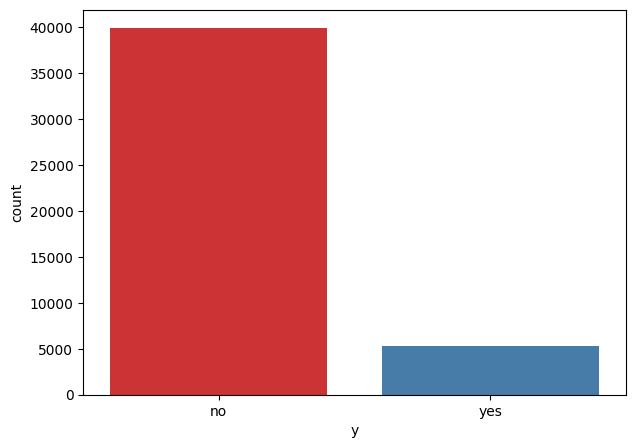

In [14]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="y", data=df, palette="Set1")
plt.show()

Berdasarkan *output* di atas, diketahui bahwa terdapat 36537 "no" dan terdapat 4639 "yes". Hal ini dapat diartikan bahwa, sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.

## Nilai dan distribusi statistik masing-masing kolom numerik

In [15]:
# Nilai statistik kolom numerik
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


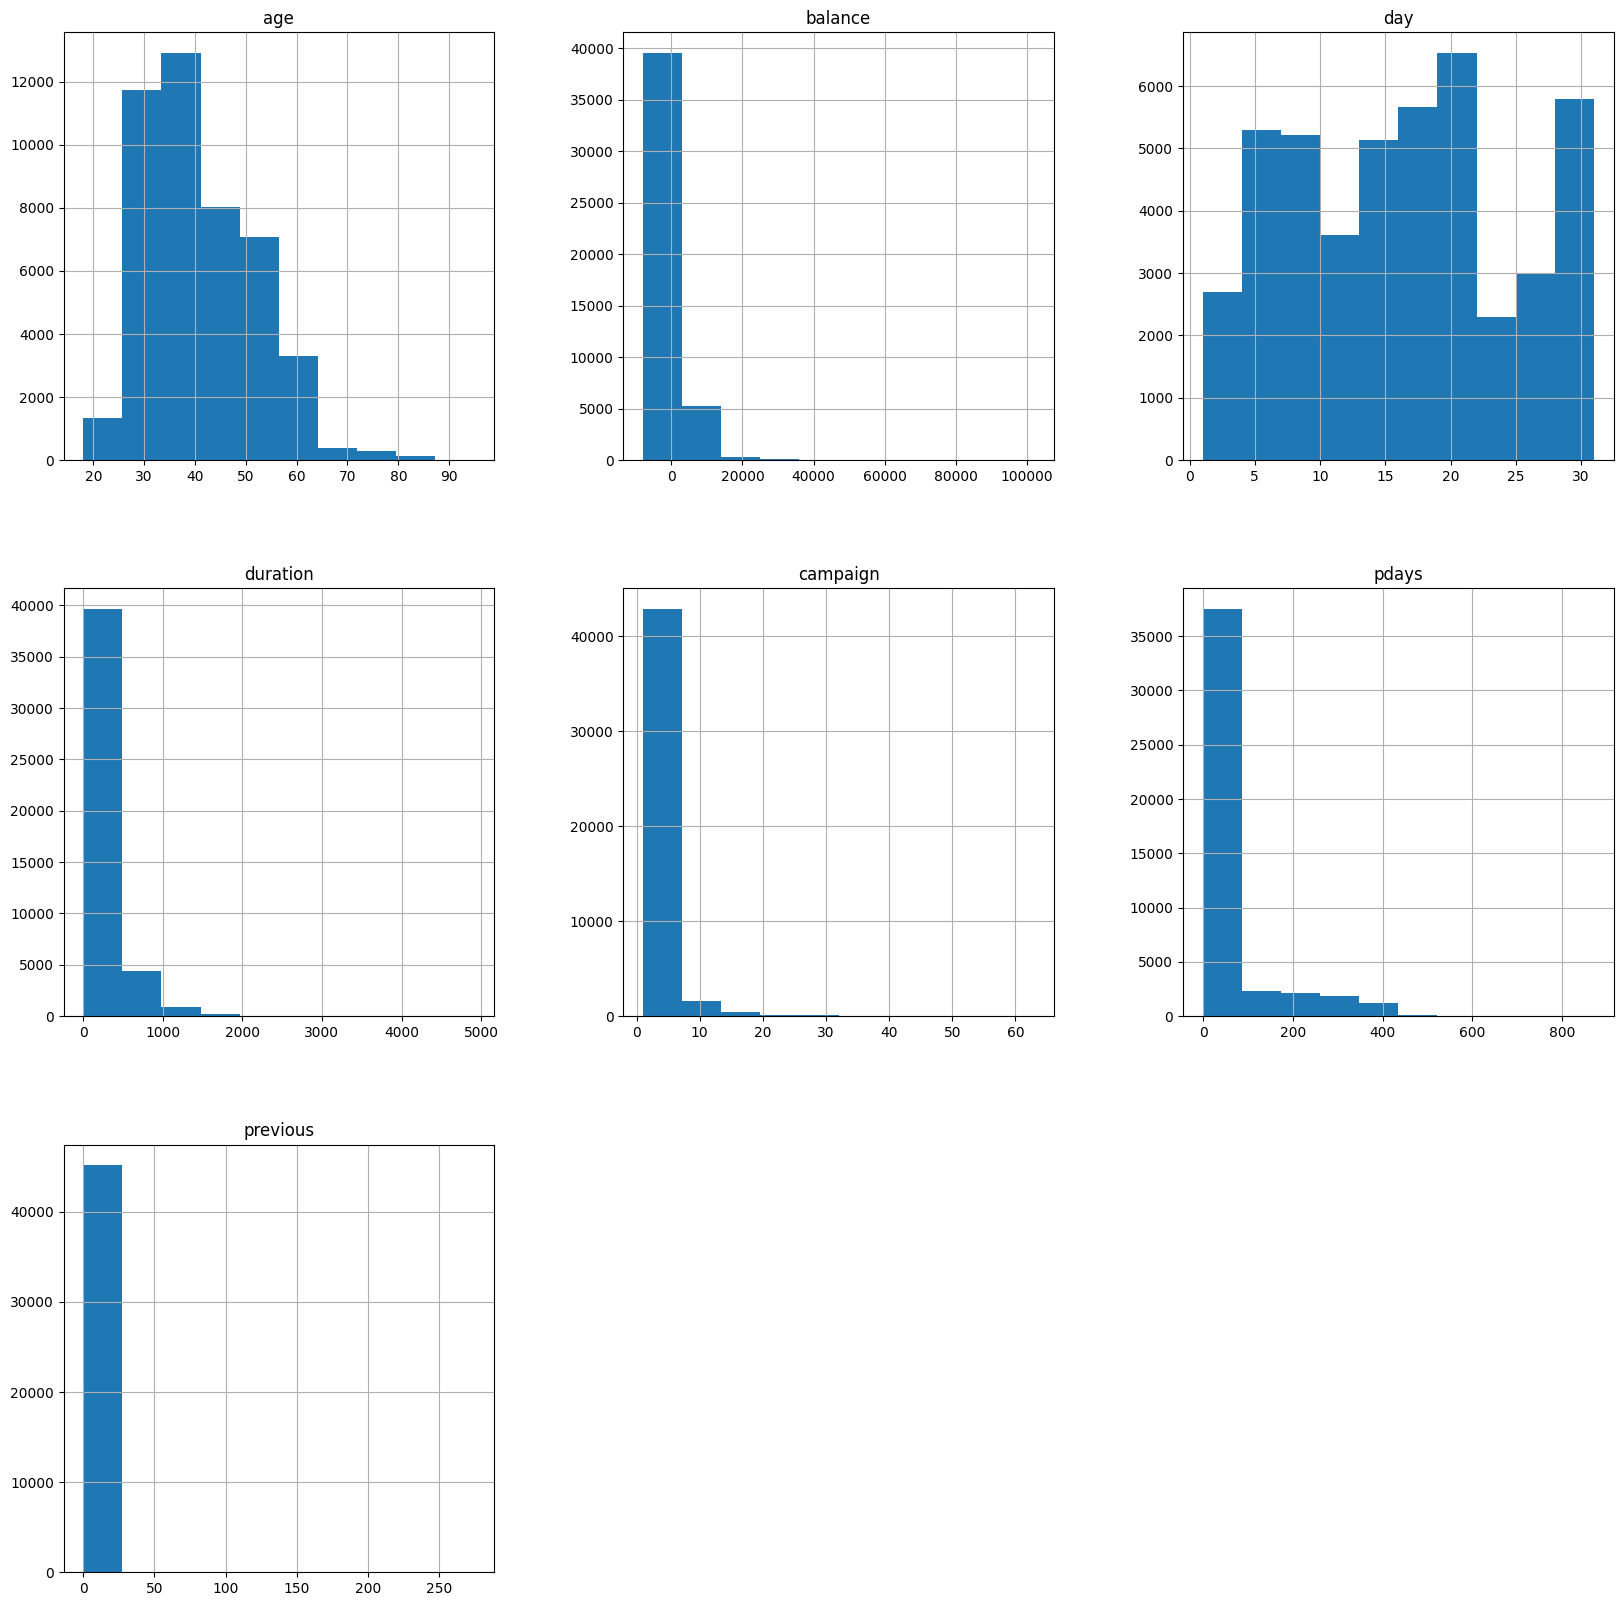

In [16]:
# Visualisasi menggunakan histogram
df.hist(figsize=(20, 20))
plt.show()

In [17]:
# Ubah daftar cols untuk hanya mencakup kolom yang ada dalam DataFrame
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'balance', 'day']

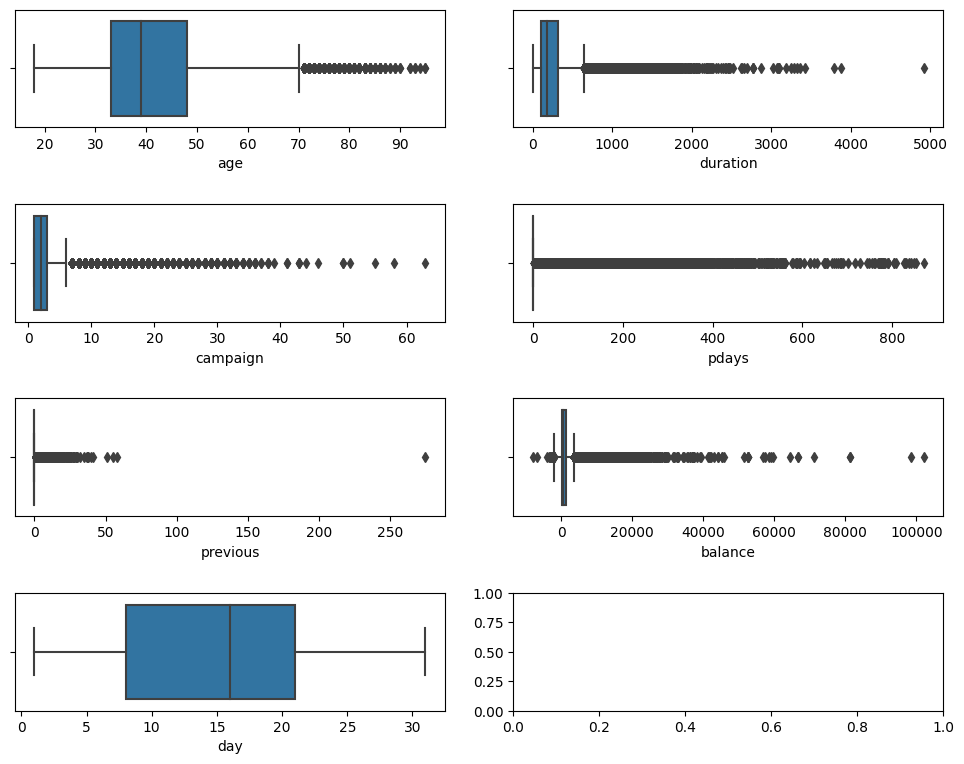

In [18]:
# Visualisasi dengan box plot
fig, ax = plt.subplots(4, 2, figsize=(10, 8))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=ax[i])

fig.tight_layout(pad=2.0)
plt.show()

# 'cons.price.idx'
#  'cons.conf.idx'
# 'euribor3m'
# 'nr.employed'

Berdasarkan *output* plot nilai dan distribusi statistik masing-masing kolom numerik di atas, diketahui bahwa:
1. Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
2. Rata-rata durasi telepon terakhir bersama klien adalah sekitar 250 detik.
3. Kontak klien yang dihubungi dalam pelaksanaan kampanye ini adalah 2-3 kontak.
4. Kebanyakan klien tidak dihubungi atau tidak melakukan kontak pada saat kampanye sebelumnya. Hal ini ditandai dengan nilai 999 pada kolom `campaign` dan juga nilai 0 pada kolom `previous` yang mempunyai frekuensi tinggi.
5. Karakteristik sosial dan ekonomi pada saat kampanye juga disertakan dalam analisis untuk dilihat pengaruhnya pada keputusan klien dalam mengambil keputusan untuk berlangganan deposito berjangka, di mana jika dilihat dari distribusi frekuensi nilai karakteristik sosial dan ekonomi pada saat itu cukup bervariasi.

## Distribusi statistik masing-masing kolom numerik berdasarkan variabel `y`

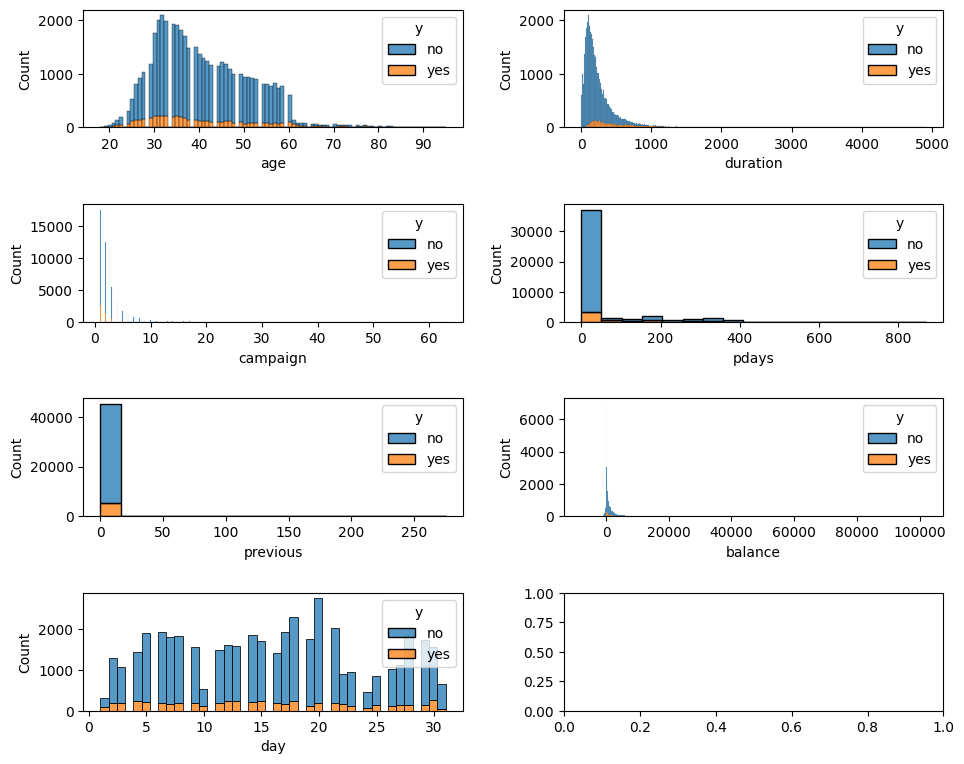

In [19]:
# Visualisasi menggunakan histogra
cols = ['age','duration','campaign','pdays','previous','balance','day']

fig, ax = plt.subplots(4, 2, figsize=(10,8))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='y', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)

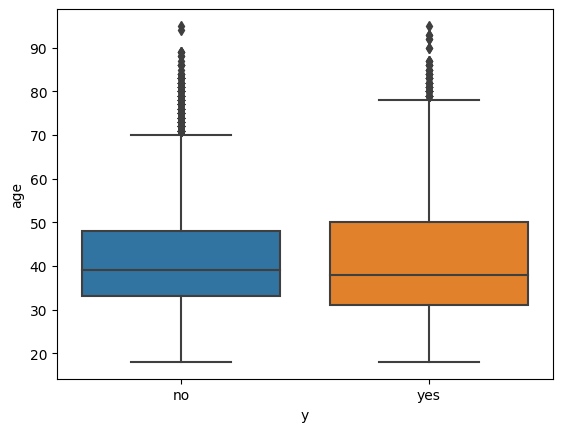

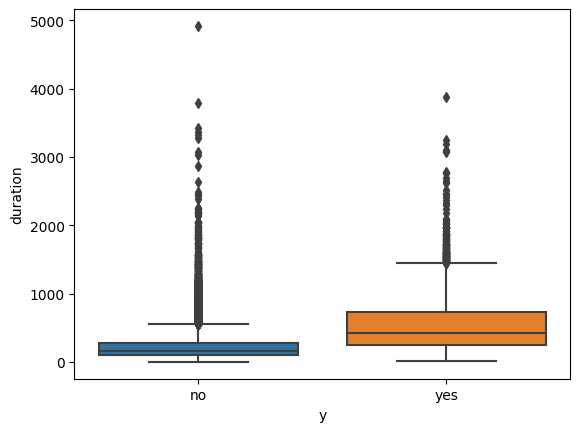

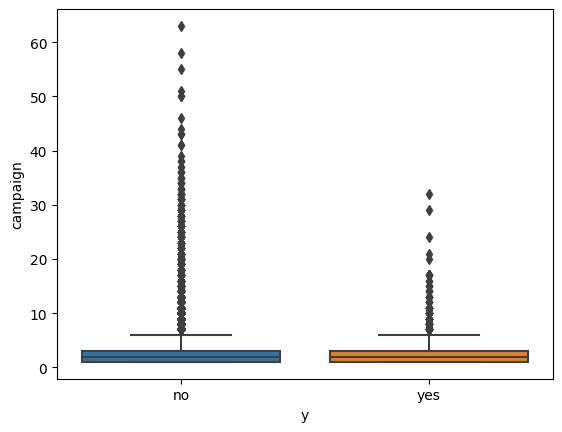

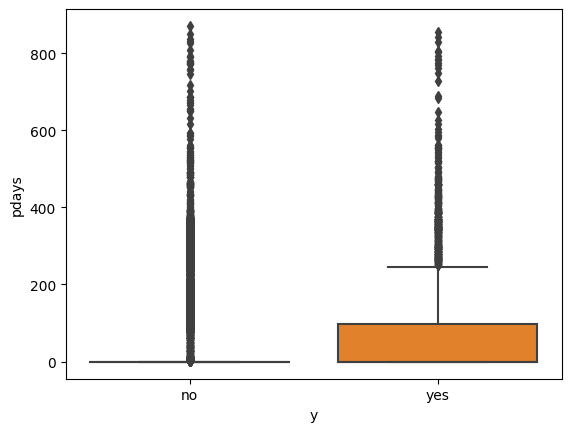

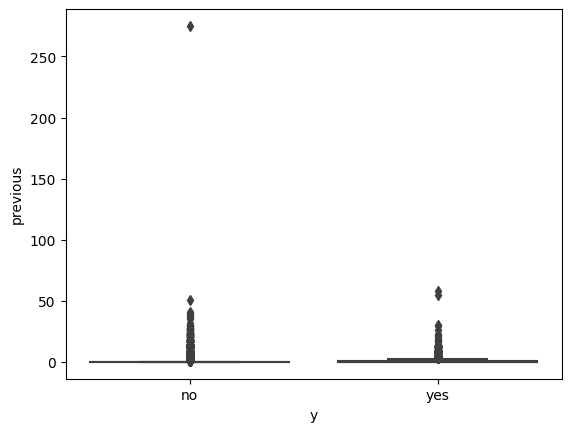

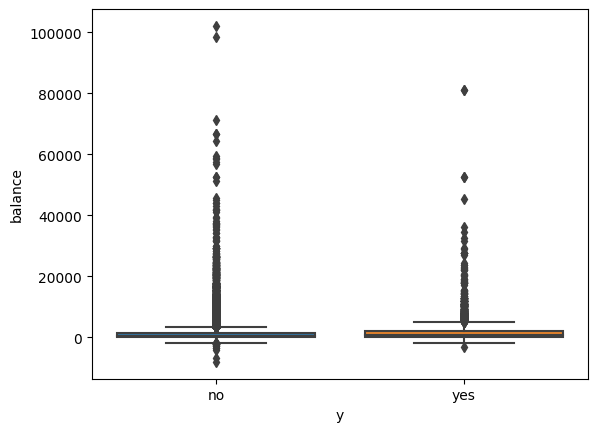

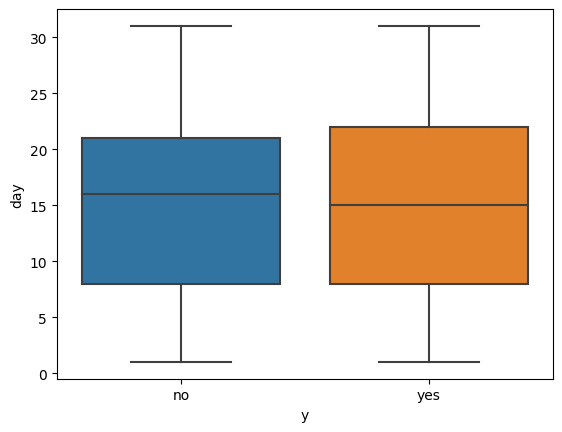

In [20]:
num_var = ["age","duration","campaign", "pdays", "previous","balance", "day"]

for i in num_var:
    sns.boxplot(x = 'y',y = i,data = df)
    plt.show()

Berdasarkan plot distribusi statistik yang dikelompokkan berdasarkan nilai pada variabel `y`-nya, diketahui bahwa:
1. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien dengan umur 30-40 tahun.
2. Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar.

Untuk melihat pengaruh variabel numerik lain terhadap variabel `y` dapat lebih jelas menggunakan matriks korelasi.

## Korelasi pada kolom numerik terhadap variabel `y`

In [21]:
# Mengubah nilai kolom y
mapping = {"yes":1,
          "no":0}

df['y'] = df['y'].map(mapping)

<ipython-input-22-893b6c67758b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")


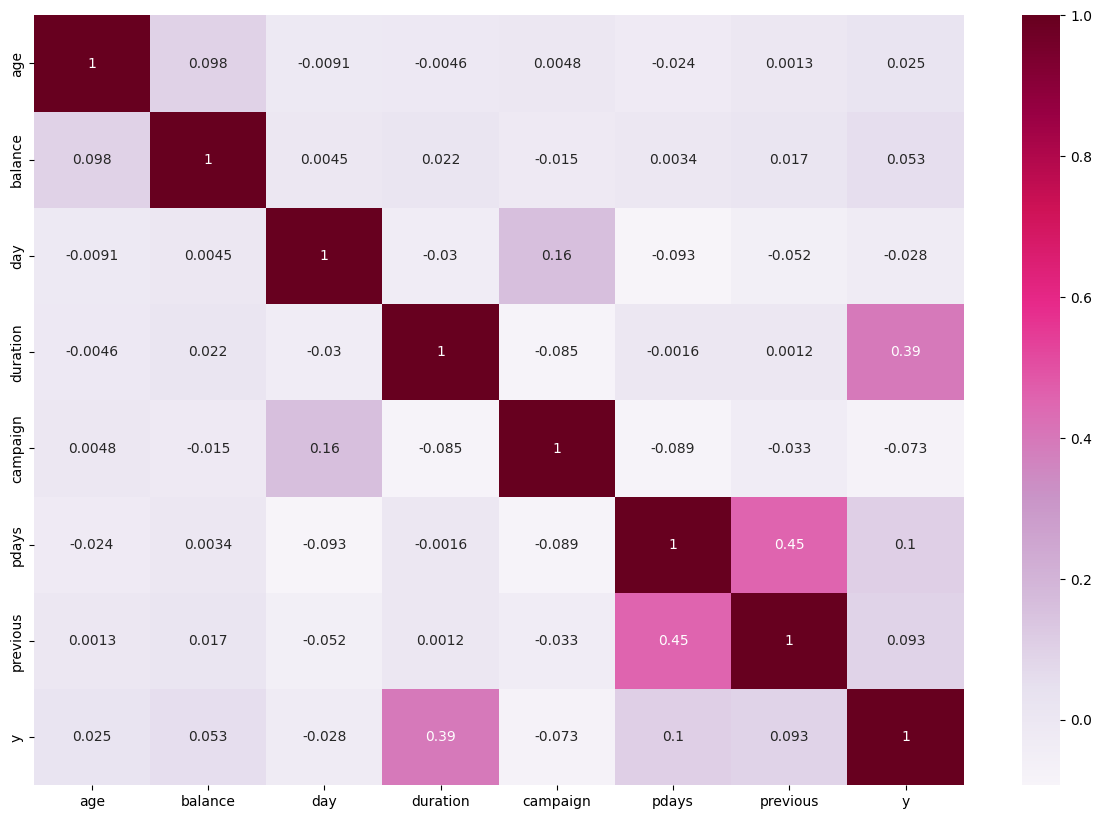

In [22]:
# Visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

Berdasarkan plot di atas, diketahui bahwa kolom `Age`, `campaign`, dan `cons.conf.idx` memiliki korelasi yang sangat rendah terhadap variabel `y`. Artinya umur klien, jumlah kontak yang dilakukan selama kampanye, dan *consumer confidence index* atau karakteristik ekonomi berupa kepercayaan konsumen cenderung tidak mempengaruhi keputusan klien dalam memilih akan berlangganan deposito berjangka atau tidak. Selain itu, kolom `Duration` memiliki korelasi yang paling tinggi terhadap variabel `y` yaitu sebesar 0.41. Ini menunjukkan bahwa durasi kontak terakhir yang dilakukan semakin panjang, maka kemungkinan klien untuk memilih berlangganan deposito berjangka akan semakin besar (hal ini juga membuktikan interpretasi secara grafis hubungan durasi dengan variabel `y` pada 5.2). Selanjutnya, karakteristik sosial dan ekonomi memiliki korelasi negatif dengan variabel `y`.

In [ ]:
# # mo dicbain tuning yakk

# from imblearn.under_sampling import RandomUnderSampler

# # Membaca dataset
# data = pd.read_csv("/content/drive/MyDrive/AI_UAS/bankresampling.csv")

# # Menampilkan jumlah sampel dan distribusi kelas sebelum resampling
# print("Jumlah sampel sebelum resampling:", len(data))
# print("Distribusi kelas sebelum resampling:")
# print(data['y'].value_counts())

# # Inisialisasi objek RandomUnderSampler
# # rus = RandomUnderSampler(sampling_strategy={'no': 5000})
# rus = RandomUnderSampler(sampling_strategy= {'no': 5000, 'yes': 'auto'})

# # Melakukan resampling pada data
# X_resampled, y_resampled = rus.fit_resample(data.drop('y', axis=1), data['y'])

# # Menggabungkan kembali fitur dan target
# resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=data.columns.drop('y')), pd.Series(y_resampled, name='y')], axis=1)

# # Menampilkan jumlah sampel dan distribusi kelas setelah resampling
# print("Jumlah sampel setelah resampling:", len(resampled_data))
# print("Distribusi kelas setelah resampling:")
# print(resampled_data['y'].value_counts())

# # YANG INI GA ADA RESAMPLE TUNING BEZIR:")

## Nilai dan distribusi statistik masing-masing kolom kategorik berdasarkan variabel `y`

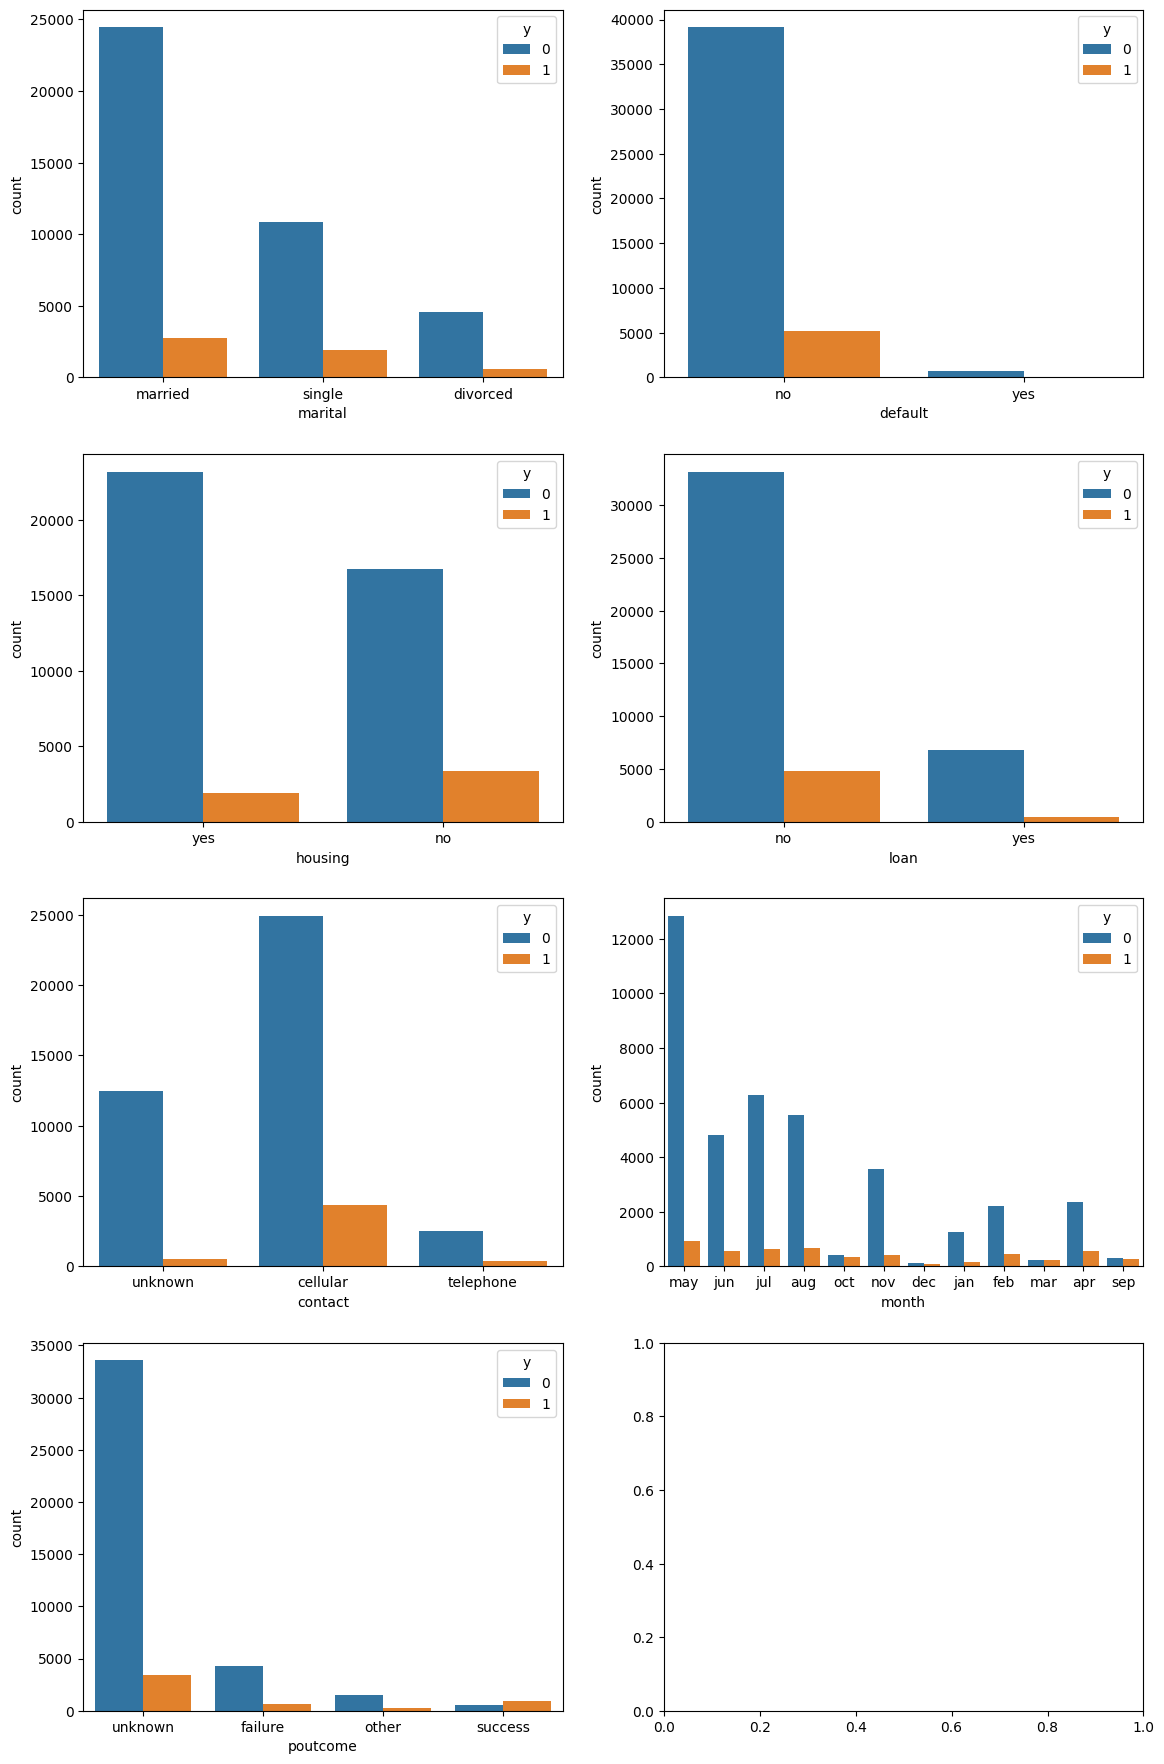

In [ ]:
# Visualisasi menggunakan countplot
cols = ['marital','default','housing','loan','contact','month','poutcome']

fig, ax = plt.subplots(4, 2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i])

fig.tight_layout(pad=2.0)

# 'day_of_week'

<Axes: xlabel='job', ylabel='count'>

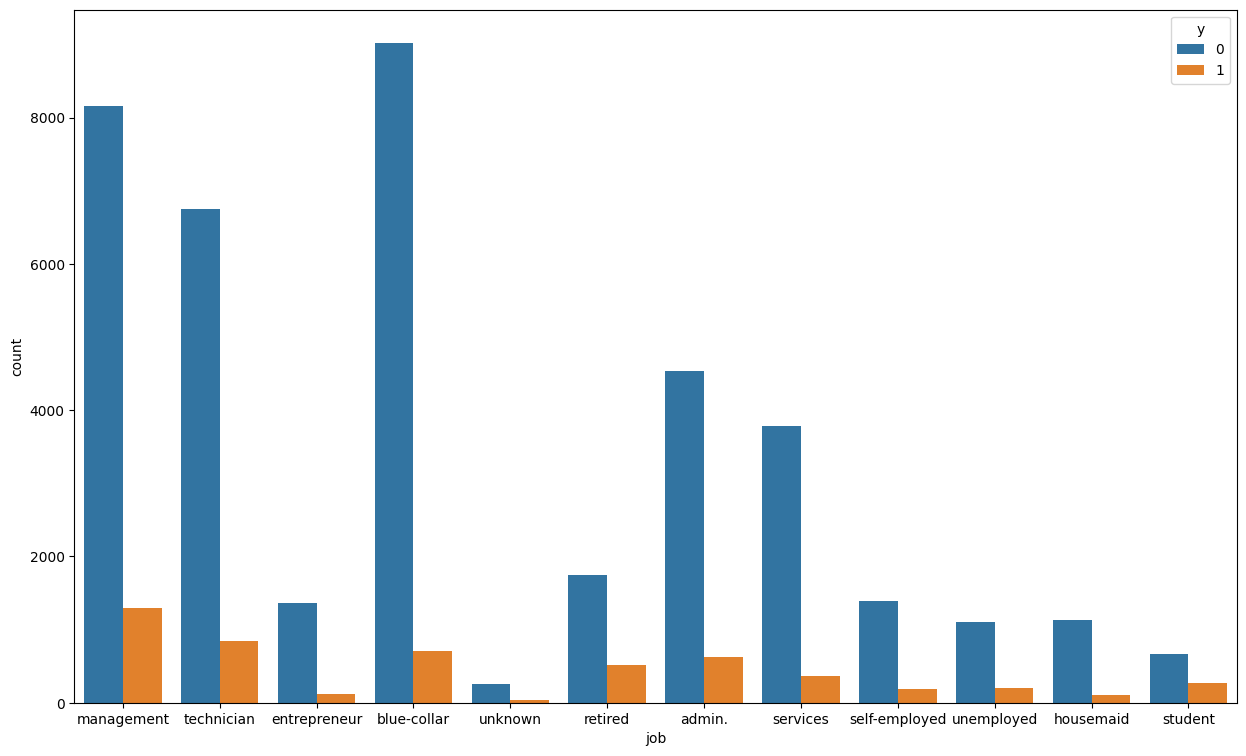

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df, x='job', hue='y')

<Axes: xlabel='education', ylabel='count'>

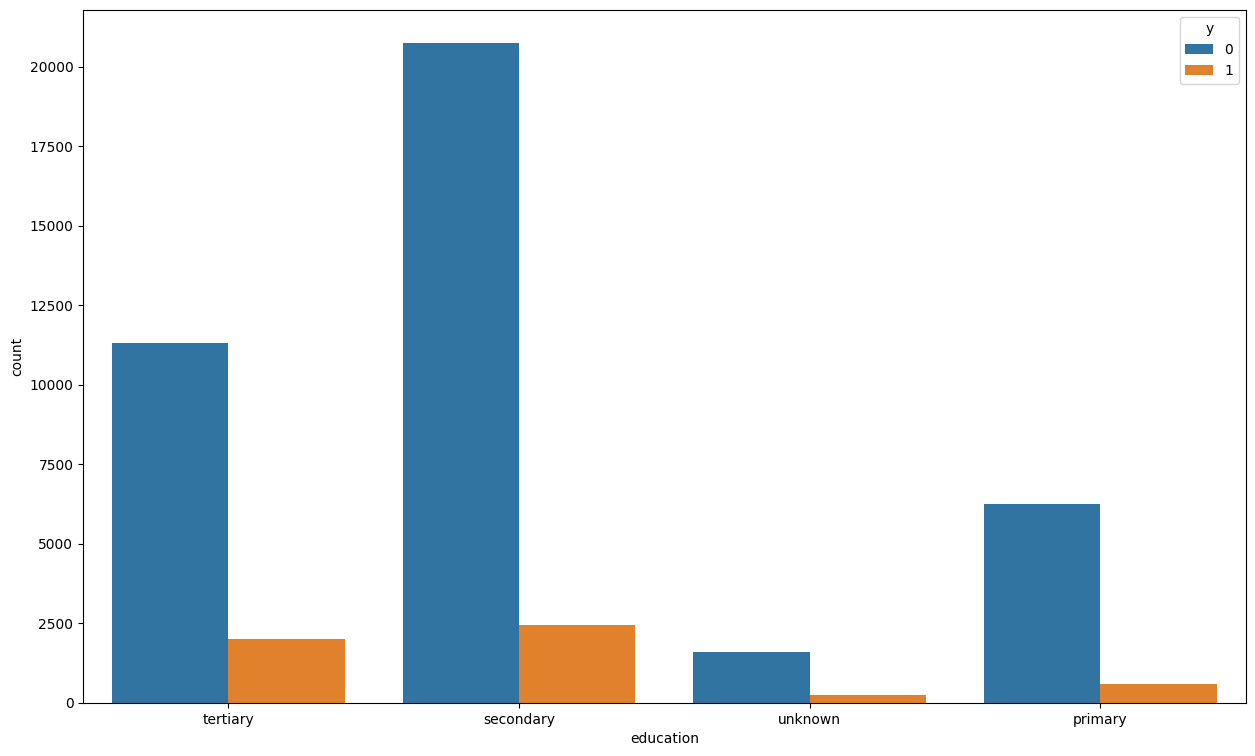

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df, x='education', hue='y')

Berdasarkan plot di atas, dapat diketahui bahwa:
1. Mayoritas klien adalah klien dengan status sudah menikah, di mana kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang sudah menikah.
2. Mayoritas klien juga memiliki rumah. Namun, kepemilikan rumah cenderung tidak memiliki pengaruh dalam keputusan klien untuk memilih berlangganan deposito atau tidak.
3. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang tidak memiliki hutang/loan.
4. Klien yang memilih untuk berlangganan deposito juga kebanyakan bekerja dengan profesi admin.
5. Mayoritas klien memiliki tingkat pendidikan yaitu *university degree*.
6. Waktu kontak yang dilakukan dengan klien tidak mempengaruhi keputusan klien untuk memilih berlangganan deposito atau tidak.

# Data preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

## Menghapus kolom yang tidak memiliki pengaruh pada variabel `y`

Sebelumnya diketahui bahwa kolom `month` dan `day_of_week` tidak memiliki pengaruh pada variabel `y`. Untuk kolom `Age`, `campaign`, dan `cons.conf.idx` tidak dihapus dan masih akan disertakan dalam analisis karena ketiga variabel ini akan dilihat pengaruhnya berdasarkan nilai *feature importance*.

In [ ]:
df.drop(['month'], axis=1, inplace=True)

## Tidak menyertakan *outlier*

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Diketahui bahwa nilai maksimum pada kolom `Age` dan `campaign` memiliki perbedaan yang sangat signifikan terhadap nilai kuartil-3. Klien dengan umur 98 tahun memiliki kemungkinan sangat kecil untuk disertakan dalam kampanye ini, sehingga umur di atas 70 tahun tidak disertakan dalam analisis. Selain itu, jumlah kontak yang dihubungi lebih dari 10 juga tidak disertakan dalam analisis karena dianggap sebagai *outlier*.

In [ ]:
df = df[df['age']<70].copy()

In [ ]:
df = df[df['campaign']<10].copy()

In [ ]:
df.reset_index(inplace=True)

## Standarisasi data

Standarisasi data dilakukan karena masing-masing kolom numerik tidak memiliki distribusi tertentu dan memiliki satuan yang berbeda.

In [ ]:
# Standarisasi dengan StandardScaler
df_scalling = df[['age','duration','pdays','previous','balance','campaign',
                  'day']]

scaler = StandardScaler()
scaler.fit(df_scalling)
scaled_features = scaler.transform(df_scalling)
df_scalling = pd.DataFrame(scaled_features,columns = df_scalling.columns)
df_scalling.head()

# 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','emp.var.rate'

,age,duration,pdays,previous,balance,campaign,day
0,1.760216,0.001798,-0.41571,-0.252768,0.266500,-0.79909,-1.284722
1,0.352004,-0.424902,-0.41571,-0.252768,-0.442649,-0.79909,-1.284722
2,-0.754448,-0.715834,-0.41571,-0.252768,-0.451706,-0.79909,-1.284722
3,0.653764,-0.653768,-0.41571,-0.252768,0.052816,-0.79909,-1.284722
4,-0.754448,-0.242585,-0.41571,-0.252768,-0.452042,-0.79909,-1.284722


## *Encoder* menggunakan pd.get_dummies pada kolom kategorik

In [ ]:
df_scalling['job'] = df['job']
df_scalling['marital'] = df['marital']
df_scalling['education'] = df['education']
df_scalling['default'] = df['default']
df_scalling['housing'] = df['housing']
df_scalling['loan'] = df['loan']
df_scalling['contact'] = df['contact']
df_scalling['poutcome'] = df['poutcome']

In [ ]:
# Encoder
df_new = pd.get_dummies(df_scalling)

In [ ]:
df_new['y'] = df['y']

In [ ]:
df_new.head()

,age,duration,pdays,previous,balance,campaign,day,job_admin.,job_blue-collar,job_entrepreneur,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.760216,0.001798,-0.41571,-0.252768,0.266500,-0.79909,-1.284722,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0.352004,-0.424902,-0.41571,-0.252768,-0.442649,-0.79909,-1.284722,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.754448,-0.715834,-0.41571,-0.252768,-0.451706,-0.79909,-1.284722,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.653764,-0.653768,-0.41571,-0.252768,0.052816,-0.79909,-1.284722,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,-0.754448,-0.242585,-0.41571,-0.252768,-0.452042,-0.79909,-1.284722,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## Splitting data

In [ ]:
X = df_new.drop('y', axis=1)
y = df_new.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pendefinisian model

In [ ]:
lr = LogisticRegression()
# knn = KNeighborsClassifier()
# svm = SVC(kernel='linear')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=200)
# nb = GaussianNB()

# Pelatihan model

In [ ]:
# Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# # K-NN
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)

In [ ]:
# # SVM

# #Mempersiapkan data
# df_.drop_duplicates(keep='last', inplace=True)
# df_.reset_index(inplace=True)
# df_.drop('index', axis=1, inplace=True)
# df_.drop(['month','day_of_week'], axis=1, inplace=True)
# df_ = df_[df_['age']<70].copy()
# df_ = df_[df_['campaign']<10].copy()
# df_.reset_index(inplace=True)

# df_scalling_ = df_[['age','duration','pdays','previous','emp.var.rate','campaign',
#                   'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

# scaler_ = StandardScaler()
# scaler_.fit(df_scalling_)
# scaled_features_ = scaler_.transform(df_scalling_)
# df_scalling_ = pd.DataFrame(scaled_features_,columns = df_scalling_.columns)

# df_scalling_['job'] = df_['job']
# df_scalling_['marital'] = df_['marital']
# df_scalling_['education'] = df_['education']
# df_scalling_['default'] = df_['default']
# df_scalling_['housing'] = df_['housing']
# df_scalling_['loan'] = df_['loan']
# df_scalling_['contact'] = df_['contact']
# df_scalling_['poutcome'] = df_['poutcome']

# df_new_ = pd.get_dummies(df_scalling_)
# df_new_['y'] = df_['y']
# mapping = {"yes":1,
#           "no":0}

# df_new_['y'] = df_['y'].map(mapping)

# X_ = df_new_.drop('y', axis=1)
# y_ = df_new_.y

# X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=0)

In [ ]:
# svm.fit(X_train_, y_train_)
# y_pred_svm = svm.predict(X_test_)

In [ ]:
# Decision Tree
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# # Gaussian NB
# nb.fit(X_train, y_train)
# y_pred_nb = nb.predict(X_test)

# Evaluasi model

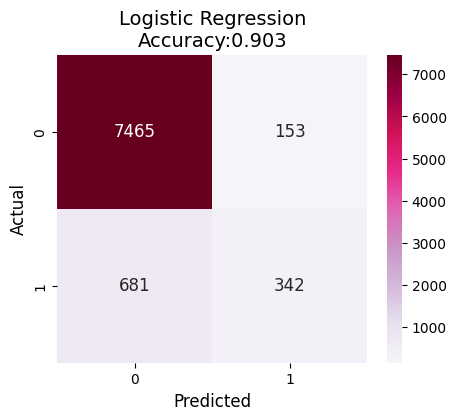

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7618
           1       0.69      0.33      0.45      1023

    accuracy                           0.90      8641
   macro avg       0.80      0.66      0.70      8641
weighted avg       0.89      0.90      0.89      8641

Accuracy Score:- 0.9034833931257956
Precision Score:- 0.6909090909090909
Recall Score:- 0.3343108504398827


In [ ]:
# Create a confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')

In [ ]:
# # Create a confusion Matrix for K-NN
# cm = confusion_matrix(y_test, y_pred_knn)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
# plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
# plt.xlabel("Predicted", fontsize=12)
# plt.ylabel("Actual", fontsize=12)
# plt.show()
# print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
# print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
# print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')

In [ ]:
# # Create a confusion Matrix for SVM
# cm = confusion_matrix(y_test_, y_pred_svm)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
# plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test_, y_pred_svm)), fontsize=14)
# plt.xlabel("Predicted", fontsize=12)
# plt.ylabel("Actual", fontsize=12)
# plt.show()
# print("Classification Report:\n", classification_report(y_test_, y_pred_svm))

# print(f'Accuracy Score:- {accuracy_score(y_test_, y_pred_svm)}')
# print(f'Precision Score:- {precision_score(y_test_,y_pred_svm)}')
# print(f'Recall Score:- {recall_score(y_test_,y_pred_svm)}')

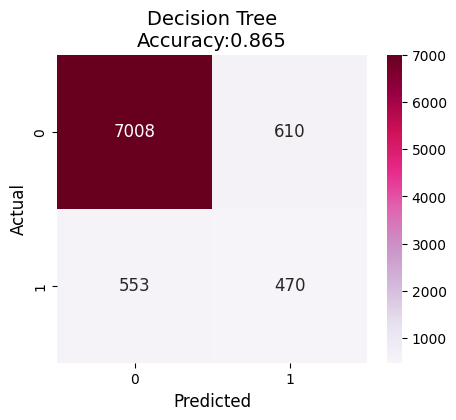

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      7618
           1       0.44      0.46      0.45      1023

    accuracy                           0.87      8641
   macro avg       0.68      0.69      0.69      8641
weighted avg       0.87      0.87      0.87      8641

Accuracy Score:- 0.8654090961694249
Precision Score:- 0.4351851851851852
Recall Score:- 0.45943304007820135


In [ ]:
# Create a confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_tree)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_tree)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_tree)}')

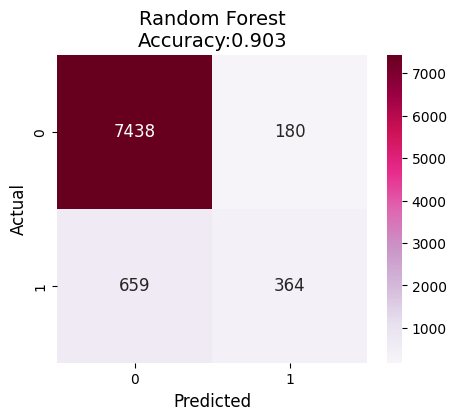

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7618
           1       0.67      0.36      0.46      1023

    accuracy                           0.90      8641
   macro avg       0.79      0.67      0.71      8641
weighted avg       0.89      0.90      0.89      8641

Accuracy Score:- 0.9029047563939359
Precision Score:- 0.6691176470588235
Recall Score:- 0.35581622678396874


In [ ]:
#  Create a confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')

In [ ]:
# # Create a confusion Matrix for Naive Bayes
# cm = confusion_matrix(y_test, y_pred_nb)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
# plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
# plt.xlabel("Predicted", fontsize=12)
# plt.ylabel("Actual", fontsize=12)
# plt.show()
# print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
# print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
# print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')

Berdasarkan hasil klasifikasi, diketahui bahwa semua algoritma belum memberikan performa prediksi klasifikasi yang cukup baik. Hal ini dikarenakan data yang digunakan adalah *imbalanced dataset* sehingga diperlukan penanganan lebih lanjut untuk kasus ini. Namun, dilihat dari masing-masing performa prediksi, algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.91, nilai presisi sebesar 0.65, nilai recall 0.47, dan f1-score sebesar 0.53.

#HYPERPARAMETER / TUNING SEK


In [ ]:
# # Hyperparameter Optimization
# parameters = {'max_features': ['log2', 'sqrt','auto'],
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50],
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# # Train the model using the training sets
# clf.fit(X_train, y_train)

In [ ]:
# lr = LogisticRegression()
# # knn = KNeighborsClassifier()
# # svm = SVC(kernel='linear')
# tree = DecisionTreeClassifier()
# rf = RandomForestClassifier(n_estimators =[100,200,300])
# # nb = GaussianNB()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4, 6, 8],
#                'min_samples_split': [5, 7,10],
#                'n_estimators': [20]}

# clf = RandomForestClassifier()
# model = GridSearchCV(estimator = clf, param_grid = grid_search,
#                                cv = 4, verbose= 5, n_jobs = -1)
# model.fit(X_train,y_train)

# predictionforest = model.best_estimator_.predict(X_test)
# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# acc4 = accuracy_score(y_test,predictionforest)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[[623 342]
 [191 792]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       965
           1       0.70      0.81      0.75       983

    accuracy                           0.73      1948
   macro avg       0.73      0.73      0.72      1948
weighted avg       0.73      0.73      0.72      1948



In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# grid_search = {
#     'n_estimator' : [100,200,300],
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# clf = RandomForestClassifier(random_state=42)
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Get best parameters
# best_params = model.best_params_
# print(f'Best Params: {best_params}')

# # Create a new RandomForestClassifier with the best parameters
# best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# prediction_forest = best_rf_clf.predict(X_test)
# print(confusion_matrix(y_test, prediction_forest))
# print(classification_report(y_test, prediction_forest))
# acc = accuracy_score(y_test, prediction_forest)
# print(f'Accuracy: {acc}')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[751 214]
 [149 834]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       965
           1       0.80      0.85      0.82       983

    accuracy                           0.81      1948
   macro avg       0.82      0.81      0.81      1948
weighted avg       0.81      0.81      0.81      1948

Accuracy: 0.8136550308008214


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# grid_search = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# clf = DecisionTreeClassifier(random_state=42)
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Get best parameters
# best_params = model.best_params_
# print(f'Best Params: {best_params}')

# # Create a new RandomForestClassifier with the best parameters
# best_rf_clf = DecisionTreeClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# prediction_forest = best_rf_clf.predict(X_test)
# print(confusion_matrix(y_test, prediction_forest))
# print(classification_report(y_test, prediction_forest))
# acc = accuracy_score(y_test, prediction_forest)
# print(f'Accuracy: {acc}')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
[[659 306]
 [170 813]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       965
           1       0.73      0.83      0.77       983

    accuracy                           0.76      1948
   macro avg       0.76      0.75      0.75      1948
weighted avg       0.76      0.76      0.75      1948

Accuracy: 0.75564681724846


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# grid_search = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# clf = LogisticRegression(random_state=42)
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Get best parameters
# best_params = model.best_params_
# print(f'Best Params: {best_params}')

# # Create a new RandomForestClassifier with the best parameters
# best_rf_clf = LogisticRegression(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# prediction_forest = best_rf_clf.predict(X_test)
# print(confusion_matrix(y_test, prediction_forest))
# print(classification_report(y_test, prediction_forest))
# acc = accuracy_score(y_test, prediction_forest)
# print(f'Accuracy: {acc}')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


ValueError: ignored

In [ ]:
# tree_clf = DecisionTreeClassifier(criterion=best_params['criterion'],
#                                   splitter=best_params['splitter'],
#                                   max_depth=best_params['max_depth'],
#                                   min_samples_split=best_params['min_samples_split'],
#                                   min_samples_leaf=best_params['min_samples_leaf'],
#                                   random_state=42)

# clf = DecisionTreeClassifier()
# model = GridSearchCV(estimator = clf, param_grid = grid_search,
#                                cv = 4, verbose= 5, n_jobs = -1)
# model.fit(X_train,y_train)

# predictionforest = model.best_estimator_.predict(X_test)
# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# acc4 = accuracy_score(y_test,predictionforest)

NameError: ignored

#hyperparameter / Tuning (ANN)

In [ ]:
!

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim= 4, activation= activation))
#     model.add(Dense(neurons, activation= activation))
#     model.add(Dropout(0.3))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
#     return model

In [ ]:
# # Defining grid parameters
# activation = ['softmax', 'relu']
# neurons = [5, 10]
# optimizer = ['Adam', 'Adamax']
# param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

# clf = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 2)

In [ ]:
# model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
# model.fit(X_Train,Y_Train)

In [ ]:
# print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3),
                                                  #  model.best_params_))

In [ ]:
# prediction_test = model.predict(X_Test)
# print(confusion_matrix(Y_Test,prediction_test))
# print(classification_report(Y_Test,prediction_test))
# accuracy_ANN = accuracy_score(Y_Test,prediction_test)

# Features Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek *feature importance* dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [ ]:
data = df_new.copy()
data.drop('y', axis=1, inplace=True)
feature_names = list(data.columns.values)

In [ ]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

duration               0.291233
balance                0.121867
age                    0.107674
day                    0.099034
poutcome_success       0.048805
pdays                  0.043073
campaign               0.042353
previous               0.023206
housing_no             0.012927
housing_yes            0.012587
education_secondary    0.011239
job_technician         0.010853
job_management         0.010601
education_tertiary     0.010405
marital_married        0.010224
contact_unknown        0.010023
job_admin.             0.009824
contact_cellular       0.009731
marital_single         0.009108
job_blue-collar        0.009025
poutcome_failure       0.008911
marital_divorced       0.007346
job_services           0.006954
poutcome_unknown       0.006879
loan_yes               0.006598
education_primary      0.006591
loan_no                0.006559
education_unknown      0.005303
job_unemployed         0.005235
job_student            0.005030
job_self-employed      0.005016
poutcome

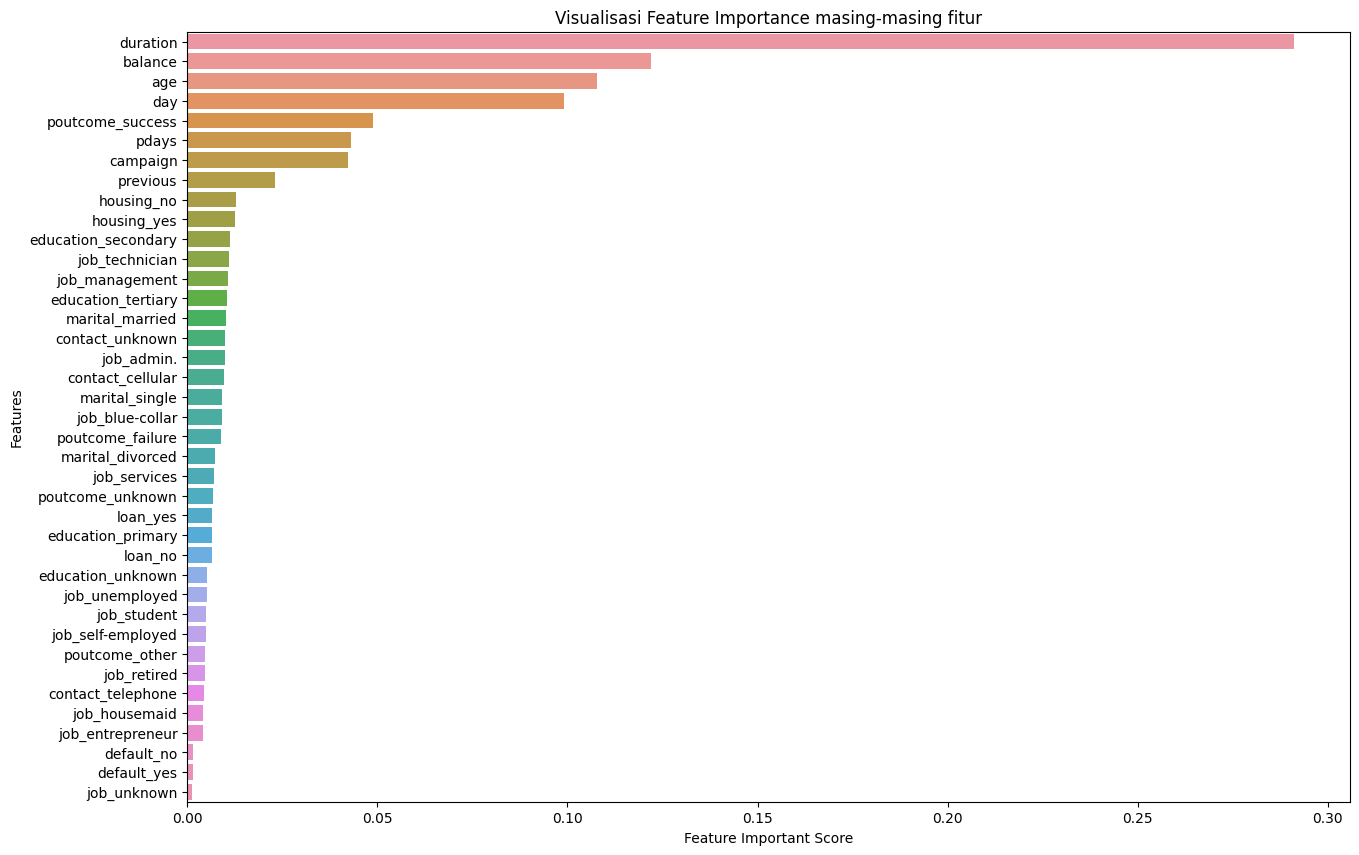

In [ ]:
# Visualisasi features importance
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

Berdasarkan plot di atas, kolom `previous` adalah kolom numerik dengan nilai *feature important* terendah. Namun, kolom ini tidak akan dihapus dari analisis karena korelasi yang cenderung tinggi dengan variabel targetnya. Sehingga, tidak ada variabel yang akan dihapus setelah pengecekan *feature importance*.

# *Conclusions*

## ***Berdasarkan  hasil keseluruhan yang telah kami lakukan. Pada prediksi peningkatan pemasaran bank dengan menggunakan 3 algoritma diantaranya Random Forest, Logistic Regression, Decision Tree. Kami melihat perbedaan tiap model, sehingga menunjukan performa terbaik dari ketiga model algoritma. Dari ketiga algoritma didapatkan hasil terbaik dari Random Forest yang telah dilakukan resample dan tuning sehingga menghasilkan akurasi sebesar 83%.***